In [3]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Step 1: Load your CSV files
X_train = pd.read_csv(r'pre-process-data\X_train.csv')
X_val = pd.read_csv(r'pre-process-data\X_val.csv')
y_train = pd.read_csv(r'pre-process-data\y_train.csv')
y_val = pd.read_csv(r'pre-process-data\y_val.csv')

# If y is a DataFrame with one column, flatten it to a Series
if y_train.shape[1] == 1:
    y_train = y_train.squeeze()
    y_val = y_val.squeeze()

# Step 2: Define evaluation function
def evaluate_model(name, model, X_val, y_val):
    y_pred = model.predict(X_val)
    mae = mean_absolute_error(y_val, y_pred)
    mse = mean_squared_error(y_val, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_val, y_pred)

    print(f"\n{name} Performance Metrics:")
    print(f"MAE:  {mae:.2f}")
    print(f"MSE:  {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R²:   {r2:.4f}")

# Step 3: Train and evaluate models

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
evaluate_model("Linear Regression", lr, X_val, y_val)

# Random Forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
evaluate_model("Random Forest", rf, X_val, y_val)

# XGBoost
xgb = XGBRegressor(random_state=42, verbosity=0)
xgb.fit(X_train, y_train)
evaluate_model("XGBoost", xgb, X_val, y_val)


Linear Regression Performance Metrics:
MAE:  0.09
MSE:  0.01
RMSE: 0.12
R²:   0.8971

Random Forest Performance Metrics:
MAE:  0.09
MSE:  0.02
RMSE: 0.13
R²:   0.8745

XGBoost Performance Metrics:
MAE:  0.09
MSE:  0.02
RMSE: 0.13
R²:   0.8722


In [4]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [5]:
# Define parameter grid
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}

# Setup GridSearch
rf_grid = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=rf_param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

# Run Grid Search
rf_grid.fit(X_train, y_train)

# Best model
best_rf = rf_grid.best_estimator_
print("Best Random Forest Parameters:", rf_grid.best_params_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Random Forest Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


In [6]:
# Define parameter grid
xgb_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

# Setup GridSearch
xgb_grid = GridSearchCV(
    estimator=XGBRegressor(random_state=42, verbosity=0),
    param_grid=xgb_param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

# Run Grid Search
xgb_grid.fit(X_train, y_train)

# Best model
best_xgb = xgb_grid.best_estimator_
print("Best XGBoost Parameters:", xgb_grid.best_params_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best XGBoost Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1.0}


In [7]:
# Use your existing evaluation function
evaluate_model("Tuned Random Forest", best_rf, X_val, y_val)
evaluate_model("Tuned XGBoost", best_xgb, X_val, y_val)


Tuned Random Forest Performance Metrics:
MAE:  0.09
MSE:  0.02
RMSE: 0.13
R²:   0.8717

Tuned XGBoost Performance Metrics:
MAE:  0.08
MSE:  0.01
RMSE: 0.12
R²:   0.9012


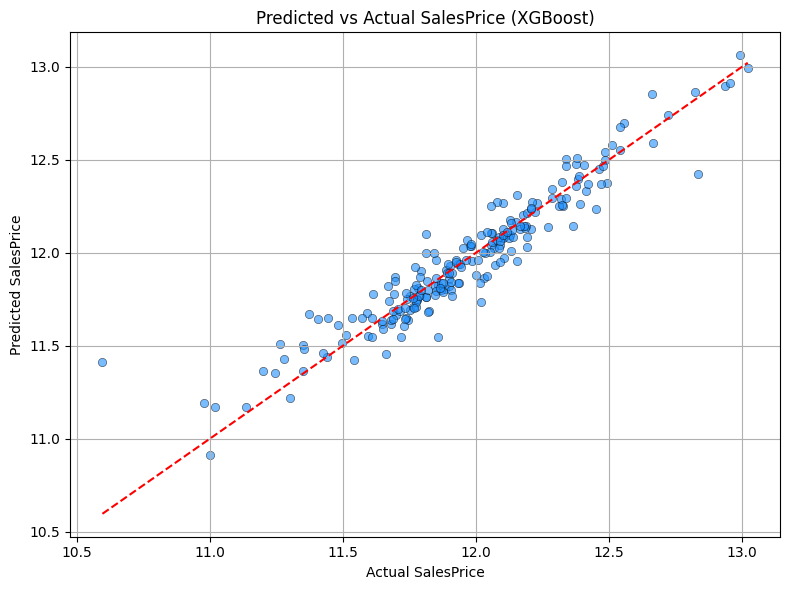

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Predict on validation set
y_pred = best_xgb.predict(X_val)

# Plot settings
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_val, y=y_pred, alpha=0.6, color='dodgerblue', edgecolor='black')
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], '--', color='red')  # 45-degree reference line

# Labels and title
plt.xlabel('Actual SalesPrice')
plt.ylabel('Predicted SalesPrice')
plt.title('Predicted vs Actual SalesPrice (XGBoost)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [9]:
%pip install streamlit

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
import joblib

# Save the trained XGBoost model
joblib.dump(best_xgb, "xgb_model.pkl")

# Optionally, save your feature list
joblib.dump(X_train.columns.tolist(), "feature_columns.pkl")

['feature_columns.pkl']

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import joblib

In [20]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import joblib

# Define a small but effective parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.8, 1.0]
}

# Setup GridSearch
gbr_grid = GridSearchCV(
    estimator=GradientBoostingRegressor(random_state=42),
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1,
    verbose=1
)

gbr_grid.fit(X_train, y_train)

# Extract the best model
best_gbr = gbr_grid.best_estimator_
print("Best Gradient Boosting Parameters:", gbr_grid.best_params_)

# Fit on training data
gbr_grid.fit(X_train, y_train)

def evaluate_model(name, model, X_val, y_val):
    y_pred = model.predict(X_val)
    mae = mean_absolute_error(y_val, y_pred)
    mse = mean_squared_error(y_val, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_val, y_pred)

    print(f"\n{name} Performance Metrics:")
    print(f"MAE:  {mae:.2f}")
    print(f"MSE:  {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R²:   {r2:.4f}")

evaluate_model("Tuned Gradient Boosting", best_gbr, X_val, y_val)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Gradient Boosting Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1.0}
Fitting 5 folds for each of 16 candidates, totalling 80 fits

Tuned Gradient Boosting Performance Metrics:
MAE:  0.08
MSE:  0.01
RMSE: 0.12
R²:   0.8976
